In [ ]:
#!pip install langgraph langsmith

In [ ]:
#!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')
langsmith = userdata.get('LANGSMITH_API_KEY')


In [ ]:
import os
os.environ["GROQ_API_KEY"] = groq_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_PROJECT"] = "LiveLanggraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key = groq_api_key,model_name = 'llama-3.1-70b-versatile')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b70f3e2f040>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b70f3e53730>, model_name='llama-3.1-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    #"Messages is a type of list and add_messages will add to the end not over right"
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [ ]:
graph_builder

In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot", chatbot)

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [ ]:
graph = graph_builder.compile()

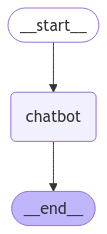

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit", "q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:", value["messa  ges"].content)

User: hello
dict_values([{'messages': AIMessage(content="Hello. It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 36, 'total_tokens': 61, 'completion_time': 0.1, 'prompt_time': 0.007343433, 'queue_time': 0.026644167, 'total_time': 0.107343433}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_b6828be2c9', 'finish_reason': 'stop', 'logprobs': None}, id='run-9fc0d528-8306-4ec8-a1dd-0733683e9e68-0', usage_metadata={'input_tokens': 36, 'output_tokens': 25, 'total_tokens': 61})}])
content="Hello. It's nice to meet you. Is there something I can help you with or would you like to chat?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 36, 'total_tokens': 61, 'completion_time': 0.1, 'prompt_time': 0.007343433, 'queue_time': 0.026644167, 'total_time': 0.107343433}, 'model_name': 'llama-3.1-7